#### Import Libraries and datasets

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

from time import time

from sklearn.metrics import accuracy_score, average_precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from livelossplot import PlotLossesKeras


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
test.shape

(28913, 35)

## All User defined functions

In [7]:
def replace_word(dataframe):
    dataframe['Verification Status']=dataframe['Verification Status'].str.replace('Source Verified','Verified')
    return dataframe

In [8]:
def encode_categorical_feature(dataframe, obj_column):
    for i in obj_column:
        dataframe[i]=encoder.fit_transform(dataframe[i])
        
    return dataframe    

In [9]:
def scale_data(x):
    inp=str(input("press train for TRAIN data. Press test for TEST data").upper())
    if inp=="TRAIN":
         #Import scale object
        from sklearn.preprocessing import RobustScaler
        scale=RobustScaler()
    
        #Creating scale object as per dataset and saving it for test
        df=scale.fit(x)
        pickle.dump(scale, open('scaler.pkl', 'wb'))
        Scaler = pickle.load(open('scaler.pkl', 'rb'))
        x_scaled=Scaler.transform(x)
        
        
    if inp=="TEST": 
        Scaler = pickle.load(open('scaler.pkl', 'rb'))
        x_scaled=Scaler.transform(x)
        
        
        
        
    robust_df = pd.DataFrame(x_scaled, columns=x.columns)
    return robust_df

In [10]:
def model_evaluate(y_test,y_pred):
    accuracy=accuracy_score(y_test, y_pred)
    F1_score=f1_score(y_test, y_pred, average=None)
    print('Accuracy is {}'.format(round(accuracy, 3)))
    print('F1 score is:', round(F1_score.mean(), 3))
    
    

#### Basic data exploration

In [11]:
train.shape

(67463, 35)

In [12]:
test.shape

(28913, 35)

To find, train and test data has the same features, we write a function

In [13]:
train_feature=list(train.columns)
test_feature=list(test.columns)

a = set(train_feature) #converting into set to compare
b = set(test_feature) #converting into set to compare

if a == b:
    print("Lists train input features and test input features are equal")
else:
    print("Lists train input features and test input features are not equal")

Lists train input features and test input features are equal


In [14]:
test["Loan Status"].value_counts()

Series([], Name: Loan Status, dtype: int64)

in test data since we have nothing, so we can drop it.

In [15]:
test.drop(["Loan Status"], inplace=True, axis=1)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  object 
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  object 
 8   Sub Grade                     28913 non-null  object 
 9   Employment Duration           28913 non-null  object 
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  object 
 12  Payment Plan                  28913 non-null  object 
 13  L

### Data Description <br><br>
<b>ID:</b> unique ID of representative<br>
<b>Loan Amount:</b> loan amount applied<br>
<b>Funded Amount:</b>loan amount funded<br>
<b>Funded Amount Investor:</b> loan amount approved by the investors<br>
<b>Term:</b> term of loan (in months)<br>
<b>Batch Enrolled:</b> batch numbers to representatives<br>
<b>Interest Rate:</b> interest rate (%) on loan<br>
<b>Grade:</b> grade by the bank<br>
<b>Sub Grade:</b> sub-grade by the bank<br>
<b>Debit to Income:</b> ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage<br>
<b>Delinquency - two years:</b> number of 30+ days delinquency in past 2 - years<br>
<b>Inquires - six months:</b> total number of inquiries in last 6 months<br>
<b>Open Account:</b> number of open credit line in representative's - credit line<br>
<b>Public Record:</b> number of derogatory public records<br>
<b>Revolving Balance:</b> total credit revolving balance<br>
<b>Revolving Utilities:</b> amount of credit a representative is using - relative to revolving_balance<br>
<b>Total Accounts:</b> total number of credit lines available in - representatives credit line<br>
<b>Initial List Status:</b> unique listing status of the loan - - W(Waiting), F(Forwarded)<br>
<b>Total Received Interest:</b> total interest received till date<br>
<b>Total Received Late Fee:</b> total late fee received till date<br>
<b>Recoveries:</b> post charge off gross recovery<br>
<b>Collection Recovery Fee:</b> post charge off collection fee<br>
<b>Collection 12 months Medical:</b> total collections in last 12 months - excluding medical collections<br>
<b>Application Type:</b> indicates when the representative is an individual or joint<br>
<b>Last week Pay:</b> indicates how long (in weeks) a representative has paid EMI after batch enrolled<br>
<b>Accounts Delinquent:</b> number of accounts on which the representative is delinquent<br>
<b>Total Collection Amount:</b> total collection amount ever owed<br>
<b>Total Current Balance:</b> total current balance from all accounts<br>
<b>Total Revolving Credit Limit:</b> total revolving credit limit<br>
<b>Loan Status:</b> 1 = Defaulter, 0 = Non Defaulters<br>

#### Splitting into input and output feature

In [18]:
x=train.drop(["Loan Status"], axis=1)
y=train["Loan Status"]

In [19]:
y.shape

(67463,)

In [20]:
x.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579


## Feature Enginnering

In [21]:
x.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit'],
      dtype='object')

In [22]:
x.head(2)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.6267,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.9210,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885


#### Drop unnecessary columns

In [23]:
unnecesarry_feature=["ID", "Batch Enrolled","Payment Plan","Accounts Delinquent", "Grade", "Sub Grade"]

In [24]:
x.drop(unnecesarry_feature, inplace=True, axis=1)
x.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,10000,32236,12329.36286,59,11.135007,MORTGAGE,176346.62670,Not Verified,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619
1,3609,11940,12191.99692,59,12.237563,RENT,39833.92100,Source Verified,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885
2,28276,9311,21603.22455,59,12.545884,MORTGAGE,91506.69105,Source Verified,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155
3,11170,6954,17877.15585,59,16.731201,MORTGAGE,108286.57590,Source Verified,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,40,9189,60214
4,16890,13226,13539.92667,59,15.008300,MORTGAGE,44234.82545,Source Verified,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,430,126029,22579


In [25]:
x_test=train.copy()

In [26]:
x_test.drop(unnecesarry_feature, inplace=True, axis=1)
x_test.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,MORTGAGE,176346.62670,Not Verified,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,RENT,39833.92100,Source Verified,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,MORTGAGE,91506.69105,Source Verified,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,MORTGAGE,108286.57590,Source Verified,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,MORTGAGE,44234.82545,Source Verified,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,430,126029,22579,0


#### Separate numerical and categorical features

In [27]:
column_int=[]
column_obj=[]
for col in x:
    dataTypeObj = x.dtypes[col]
    if dataTypeObj == np.int64 or dataTypeObj == np.float64 :
        column_int.append(col)
    if dataTypeObj== np.object:
        column_obj.append(col)

In [28]:
display("Numerical features:", column_int)
display("-"*80)
display("Categorical features:", column_obj)

'Numerical features:'

['Loan Amount',
 'Funded Amount',
 'Funded Amount Investor',
 'Term',
 'Interest Rate',
 'Home Ownership',
 'Debit to Income',
 'Delinquency - two years',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Revolving Utilities',
 'Total Accounts',
 'Total Received Interest',
 'Total Received Late Fee',
 'Recoveries',
 'Collection Recovery Fee',
 'Collection 12 months Medical',
 'Last week Pay',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit']

'--------------------------------------------------------------------------------'

'Categorical features:'

['Employment Duration',
 'Verification Status',
 'Loan Title',
 'Initial List Status',
 'Application Type']

#### cheque for irregularities in categorical features

In [29]:
for i in column_obj:
    print("_"*50)
    print("Column name:", i)
    display(x[i].value_counts())
    print("_"*50)

__________________________________________________
Column name: Employment Duration


MORTGAGE    36351
RENT        24150
OWN          6962
Name: Employment Duration, dtype: int64

__________________________________________________
__________________________________________________
Column name: Verification Status


Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

__________________________________________________
__________________________________________________
Column name: Loan Title


Credit card refinancing       30728
Debt consolidation            24841
Debt Consolidation             3544
Other                          2455
Home improvement               2211
Major purchase                  487
Medical expenses                237
Business                        183
Moving and relocation           157
Car financing                   135
Vacation                        114
debt consolidation              105
Consolidation                    97
Home buying                      94
Personal Loan                    78
Debt Consolidation Loan          71
Credit Card Consolidation        68
Home Improvement                 68
Consolidate                      55
Consolidation Loan               55
consolidation                    51
payoff                           50
DEBT CONSOLIDATION               46
Green loan                       45
Credit Card Debt                 45
Freedom                          45
consolidate                      42
Credit Card Refinance       

__________________________________________________
__________________________________________________
Column name: Initial List Status


w    36299
f    31164
Name: Initial List Status, dtype: int64

__________________________________________________
__________________________________________________
Column name: Application Type


INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64

__________________________________________________


In <b>Verification Status</b> feature we have 3 catergories: Source Verified, Verified, Not Verified, where Source Verified, and Verified are the same so we can replace Source Verified to Verified

In [30]:
x=replace_word(x)

In [31]:
x["Verification Status"].value_counts()

Verified        51114
Not Verified    16349
Name: Verification Status, dtype: int64

#### cheque for null values

In [32]:
x.isnull().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Interest Rate                   0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Total Collection Amount         0
Total Current Balance           0
Total Revolving Credit Limit    0
dtype: int64

In [33]:
y.isnull().sum()

0

No null values are present in the dataset.

#### cheque for outliers

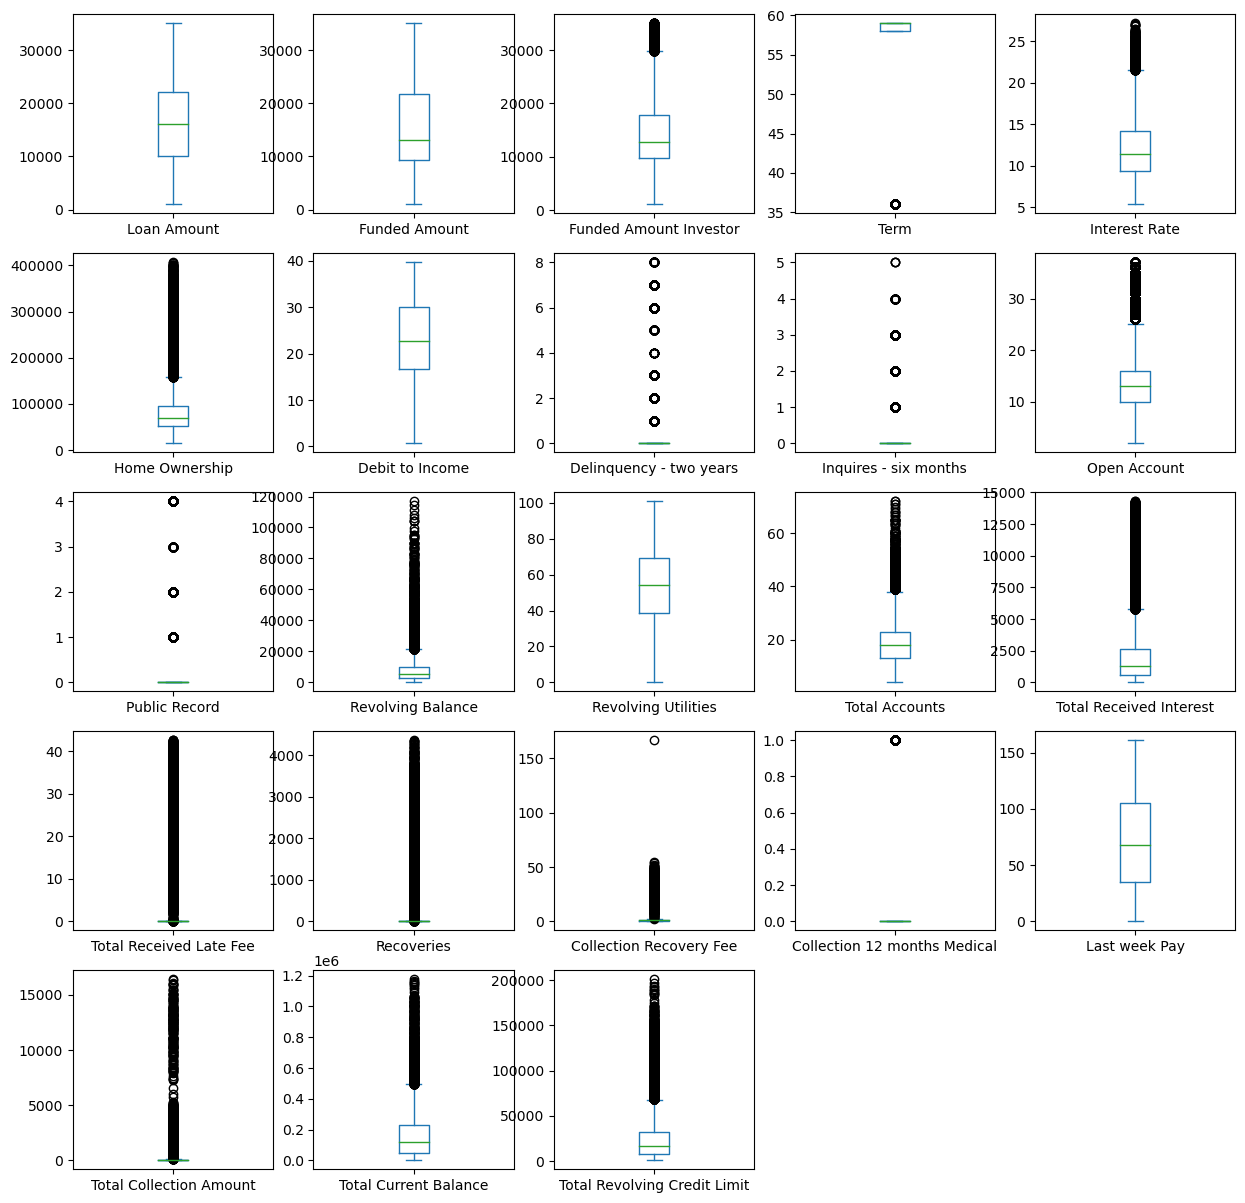

In [34]:
x.plot(kind="box", subplots=True, layout=(5,5), figsize=(15,15));

We have many outliers in the datasets but all of those are real dataset so we should not remove the outliers but we can use Robust scaler to handle all of those.

## Exploratory data analysis

In [35]:
x.head(3)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,10000,32236,12329.36286,59,11.135007,MORTGAGE,176346.62670,Not Verified,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619
1,3609,11940,12191.99692,59,12.237563,RENT,39833.92100,Verified,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885
2,28276,9311,21603.22455,59,12.545884,MORTGAGE,91506.69105,Verified,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155


Amount of loan get approved

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

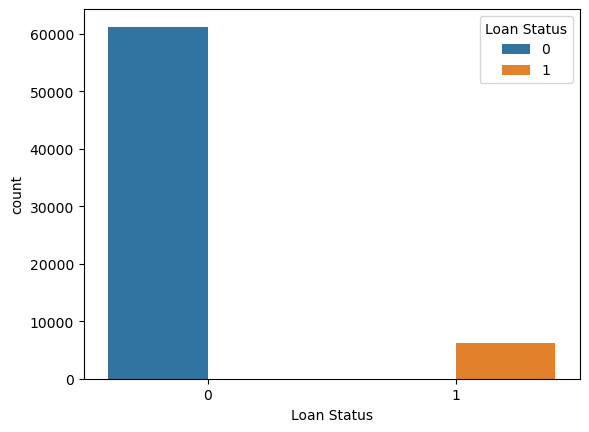

In [36]:
sns.countplot(x="Loan Status", data=train, hue="Loan Status")

Amount of loan arropved for each term

<AxesSubplot:xlabel='Loan Status', ylabel='Term'>

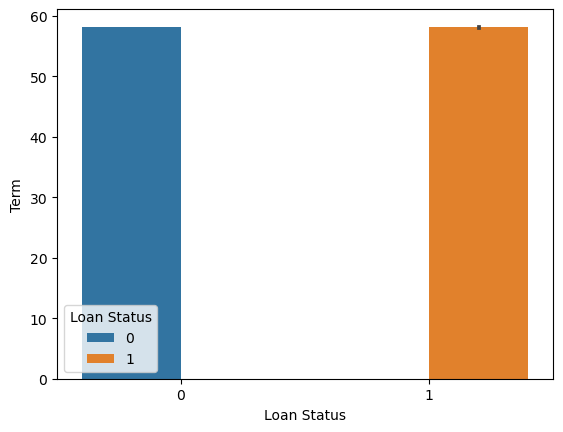

In [37]:
sns.barplot(x="Loan Status", y="Term",hue="Loan Status",data=train)

It is clear that, term has no major effects in Loan Status

Text(0, 0.5, 'Percentage')

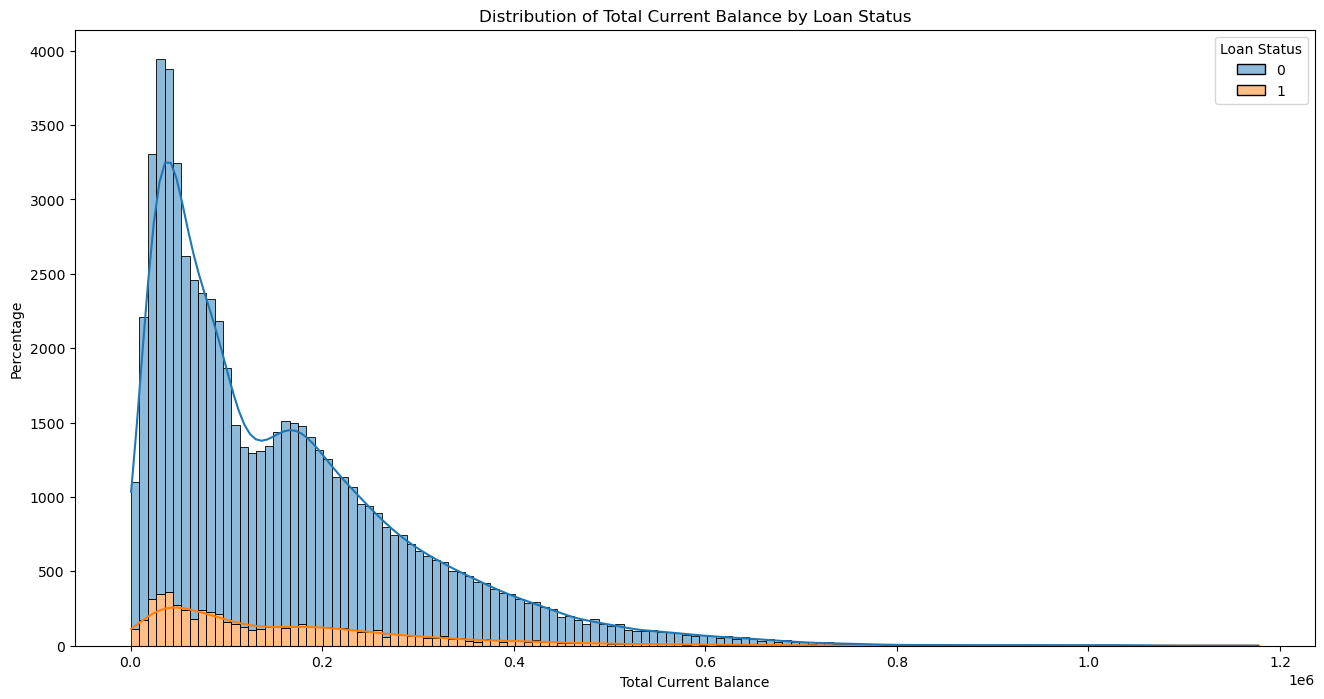

In [38]:
plt.figure(figsize = (16, 8))
sns.histplot(data=train, x="Total Current Balance",hue="Loan Status", multiple="stack", kde=True)



# Add a title and axis labels
plt.title("Distribution of Total Current Balance by Loan Status")
plt.xlabel("Total Current Balance")
plt.ylabel("Percentage")

<AxesSubplot:xlabel='Loan Amount', ylabel='Interest Rate'>

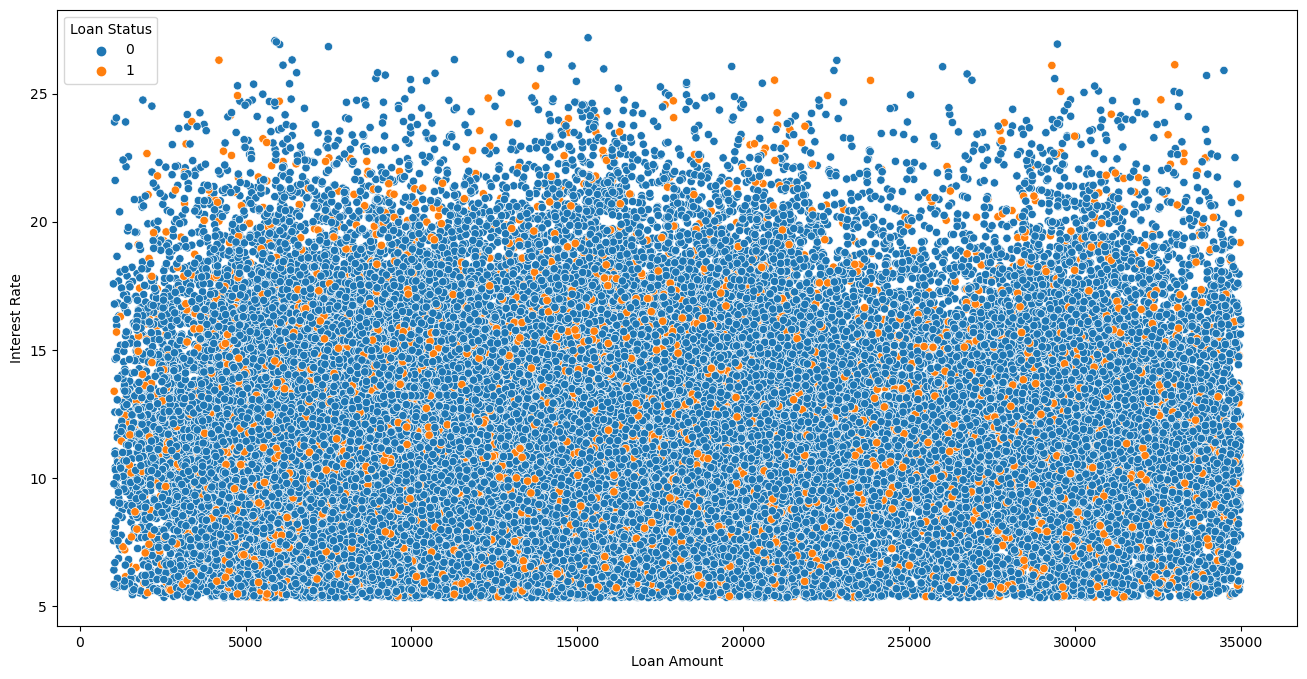

In [39]:
plt.figure(figsize = (16, 8))
sns.scatterplot(x="Loan Amount", y="Interest Rate", hue="Loan Status", data=train)

<AxesSubplot:xlabel='Application Type', ylabel='Loan Amount'>

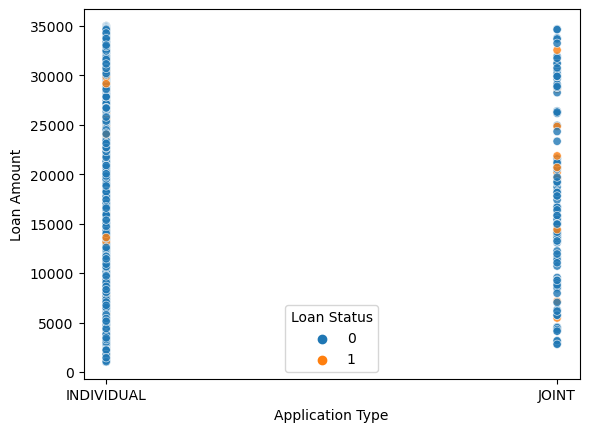

In [40]:
sns.scatterplot(data=train, x="Application Type",y="Loan Amount", hue="Loan Status", alpha=0.8)

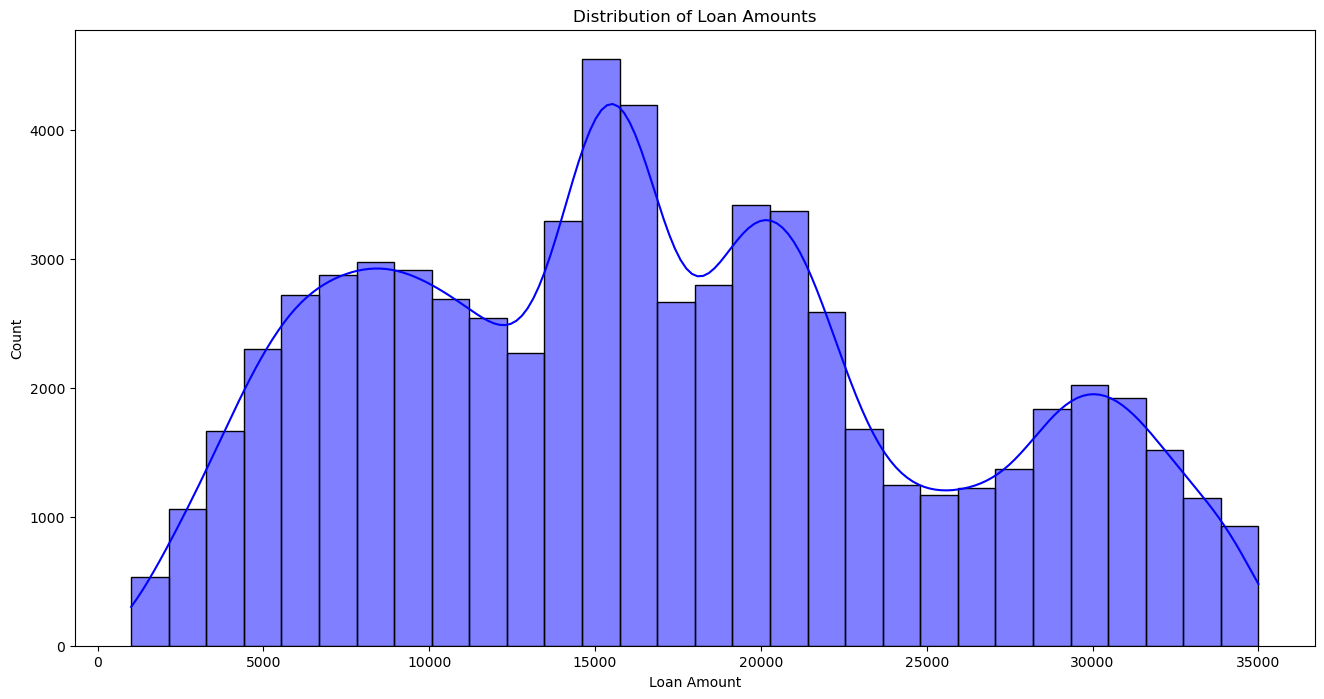

In [41]:
plt.figure(figsize = (16, 8))
fig = sns.histplot(data=train, x='Loan Amount', kde=True, bins=30, color='blue')


plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.title("Distribution of Loan Amounts") # You can comment this line out if you don't need title
plt.show(fig)

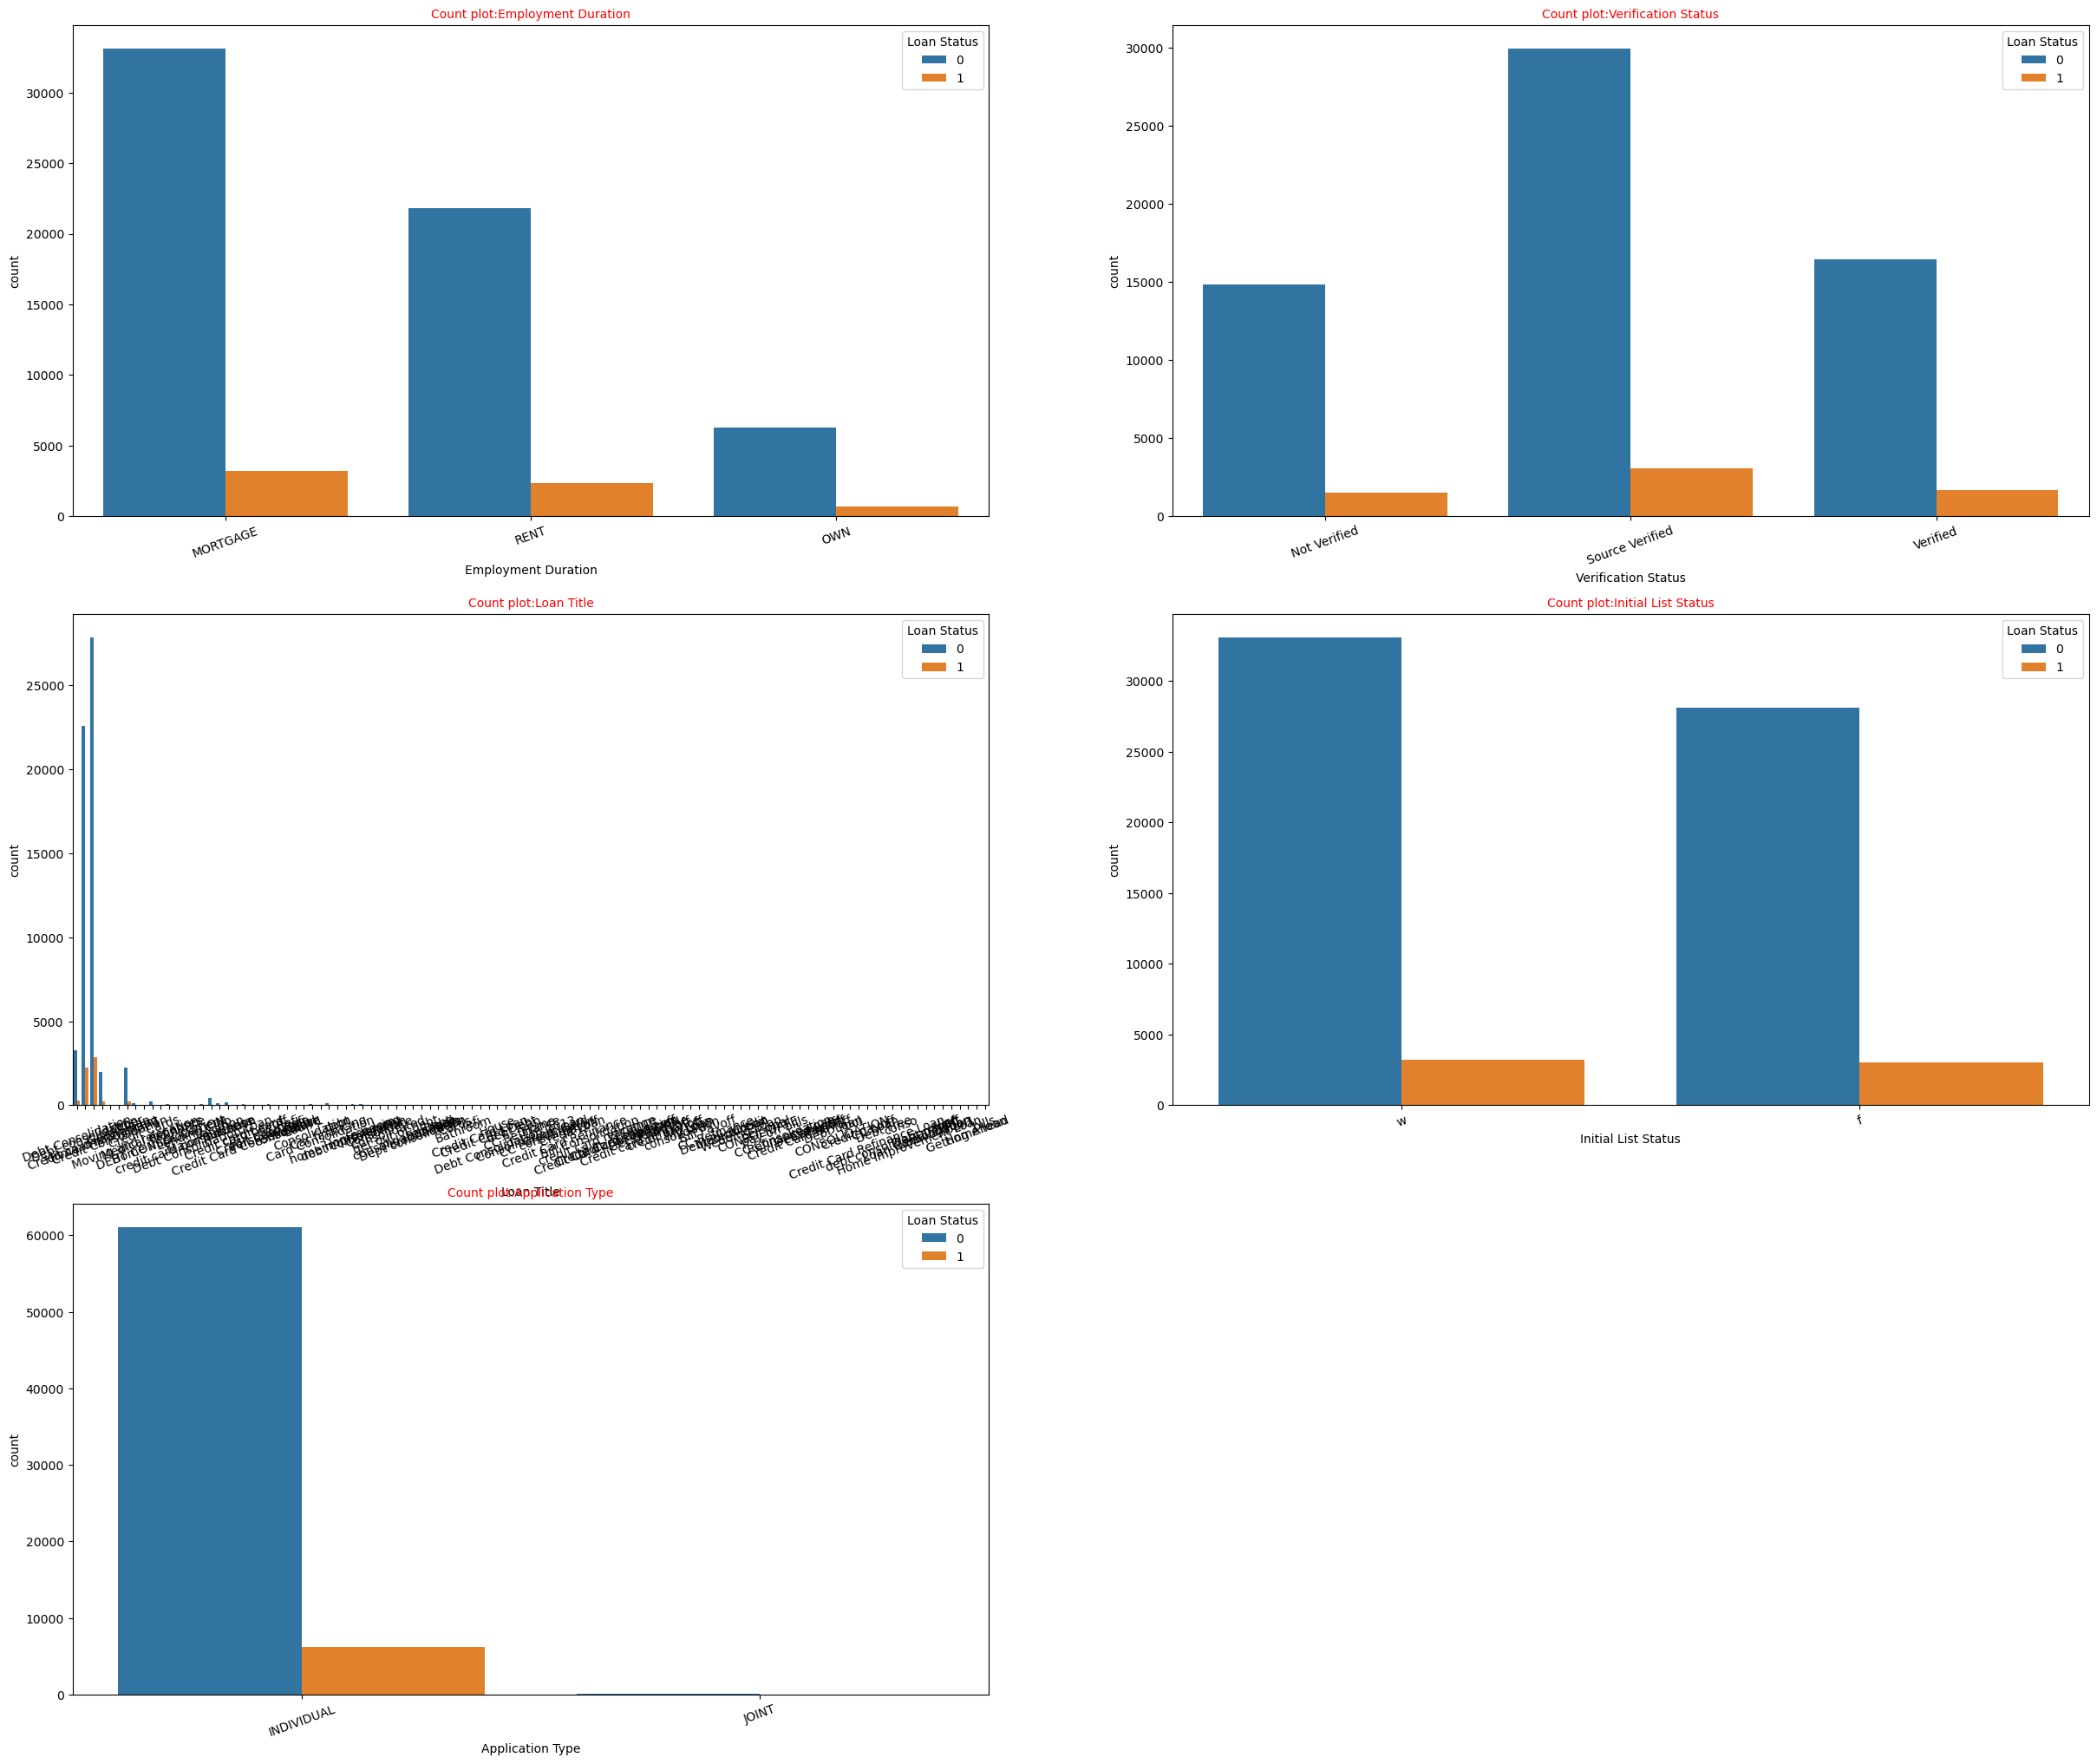

In [42]:
#cat_col=list(train.select_dtypes(include='object').columns)
plt.figure(figsize=(30,25))
for i  in range(len(column_obj)):
    plt.subplot(3,2,(i+1))
    sns.countplot(data=train,x=column_obj[i],hue='Loan Status')
    plt.xticks(rotation=20)
    plt.xlabel("{}".format(column_obj[i]))
    plt.title("Count plot:{}".format(column_obj[i]),fontsize=10,color='red')

## Feature Selection

#### Correlation and heatmap

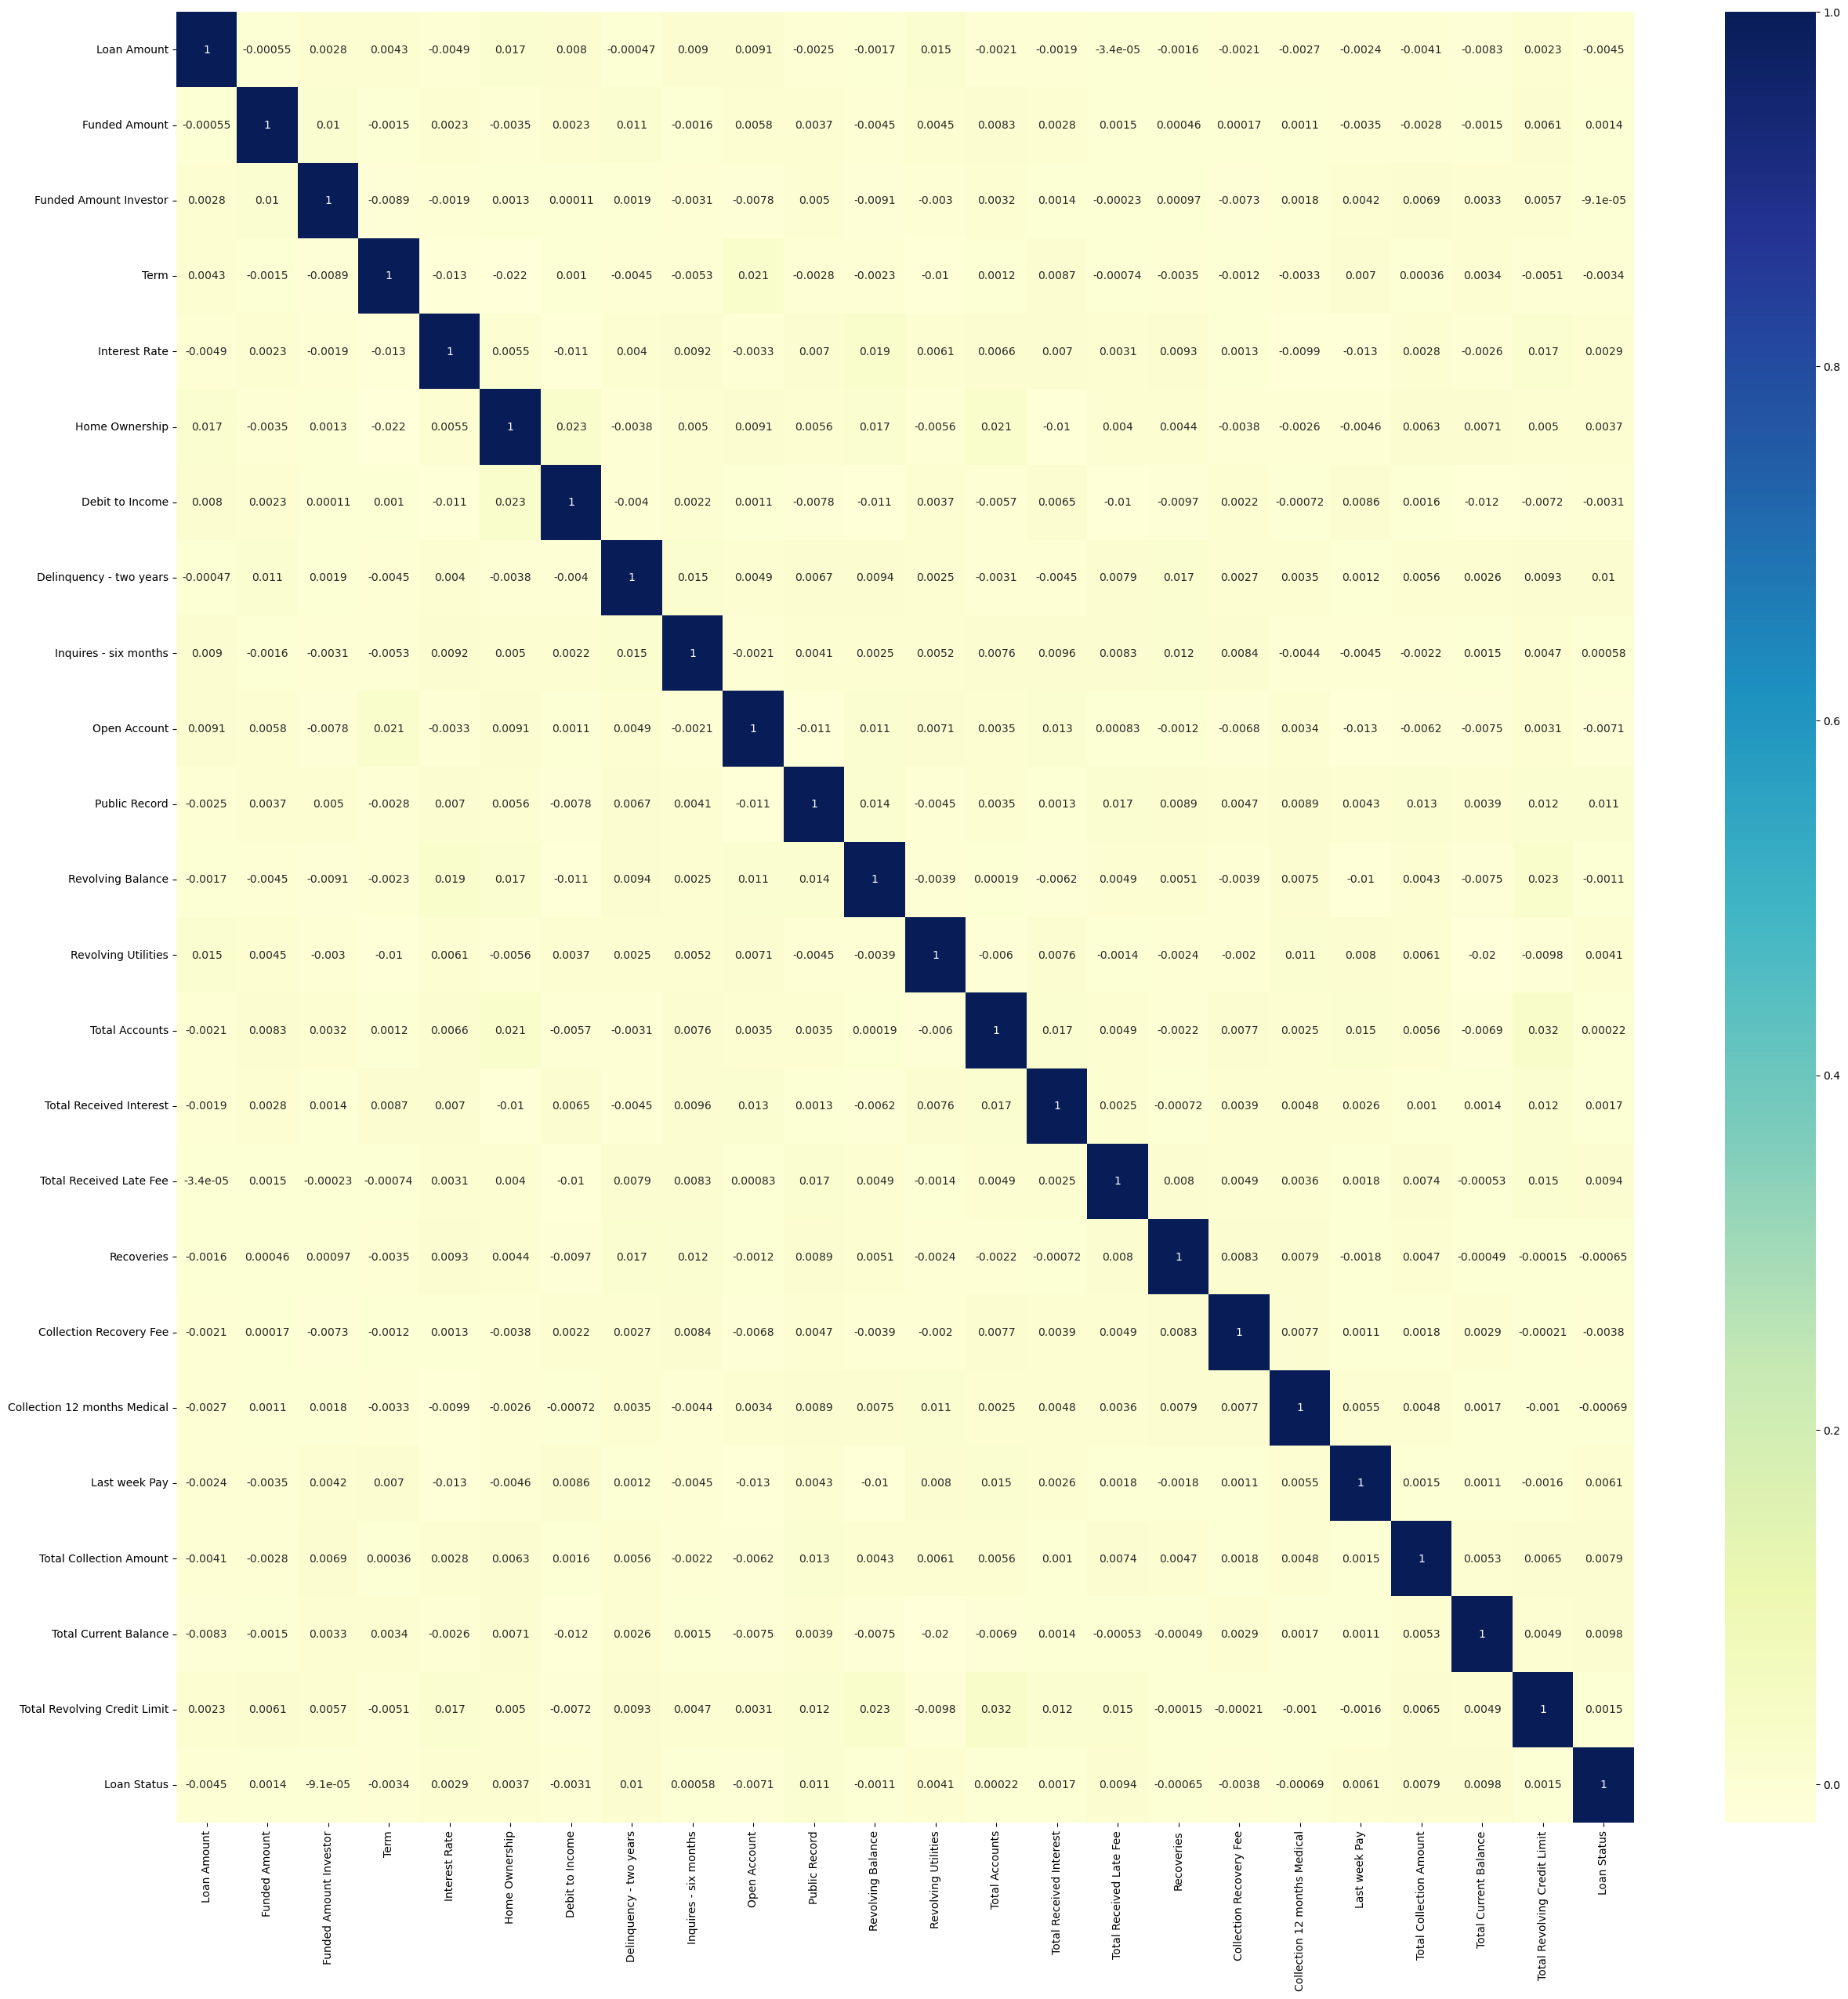

In [43]:
plt.figure(figsize = (30,30))
sns.heatmap(train.drop(unnecesarry_feature, axis=1).corr(), cmap="YlGnBu", annot=True)
plt.show()

From the above heatmap, it is clear that there is no major correlation between features that can affect out models.

#### Convert categorical features into numerical features

In [44]:
x=encode_categorical_feature(x, column_obj)

In [45]:
x.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,10000,32236,12329.36286,59,11.135007,0,176346.62670,0,42,16.284758,1,0,13,0,24246,74.932551,7,1,2929.646315,0.102055,2.498291,0.793724,0,0,49,31,311301,6619
1,3609,11940,12191.99692,59,12.237563,2,39833.92100,1,49,15.412409,0,0,12,0,812,78.297186,13,0,772.769385,0.036181,2.377215,0.974821,0,0,109,53,182610,20885
2,28276,9311,21603.22455,59,12.545884,0,91506.69105,1,42,28.137619,0,0,14,0,1843,2.073040,20,1,863.324396,18.778660,4.316277,1.020075,0,0,66,34,89801,26155
3,11170,6954,17877.15585,59,16.731201,0,108286.57590,1,49,18.043730,1,0,7,0,13819,67.467951,12,1,288.173196,0.044131,0.107020,0.749971,0,0,39,40,9189,60214
4,16890,13226,13539.92667,59,15.008300,0,44234.82545,1,38,17.209886,1,3,13,1,1544,85.250761,22,1,129.239553,19.306646,1294.818751,0.368953,0,0,18,430,126029,22579


#### Create synthetic data <br>
(if the data set is imbalanced in nature)

In [46]:
y.value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

it is clear that we have very large amount of imbalanced data which can lead to overfitting problem. So deal with overfitting problem, we have to use SMOTE technique to generate more synthatic data.

In [47]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote.fit(x,y)
x,y=smote.fit_resample(x,y)

In [48]:
y.value_counts()

0    61222
1    61222
Name: Loan Status, dtype: int64

#### Feature importance

[0.04000532 0.04058885 0.03913867 0.03185034 0.04074638 0.06312954
 0.03896179 0.02612141 0.04685704 0.0472949  0.02193123 0.01365175
 0.03802377 0.01157338 0.03930077 0.04387148 0.03799348 0.05861801
 0.04144197 0.03884986 0.03449732 0.03653911 0.00633242 0.00040375
 0.0486226  0.03434095 0.04043512 0.03887882]
Plotting graph of feature importances for better visualization


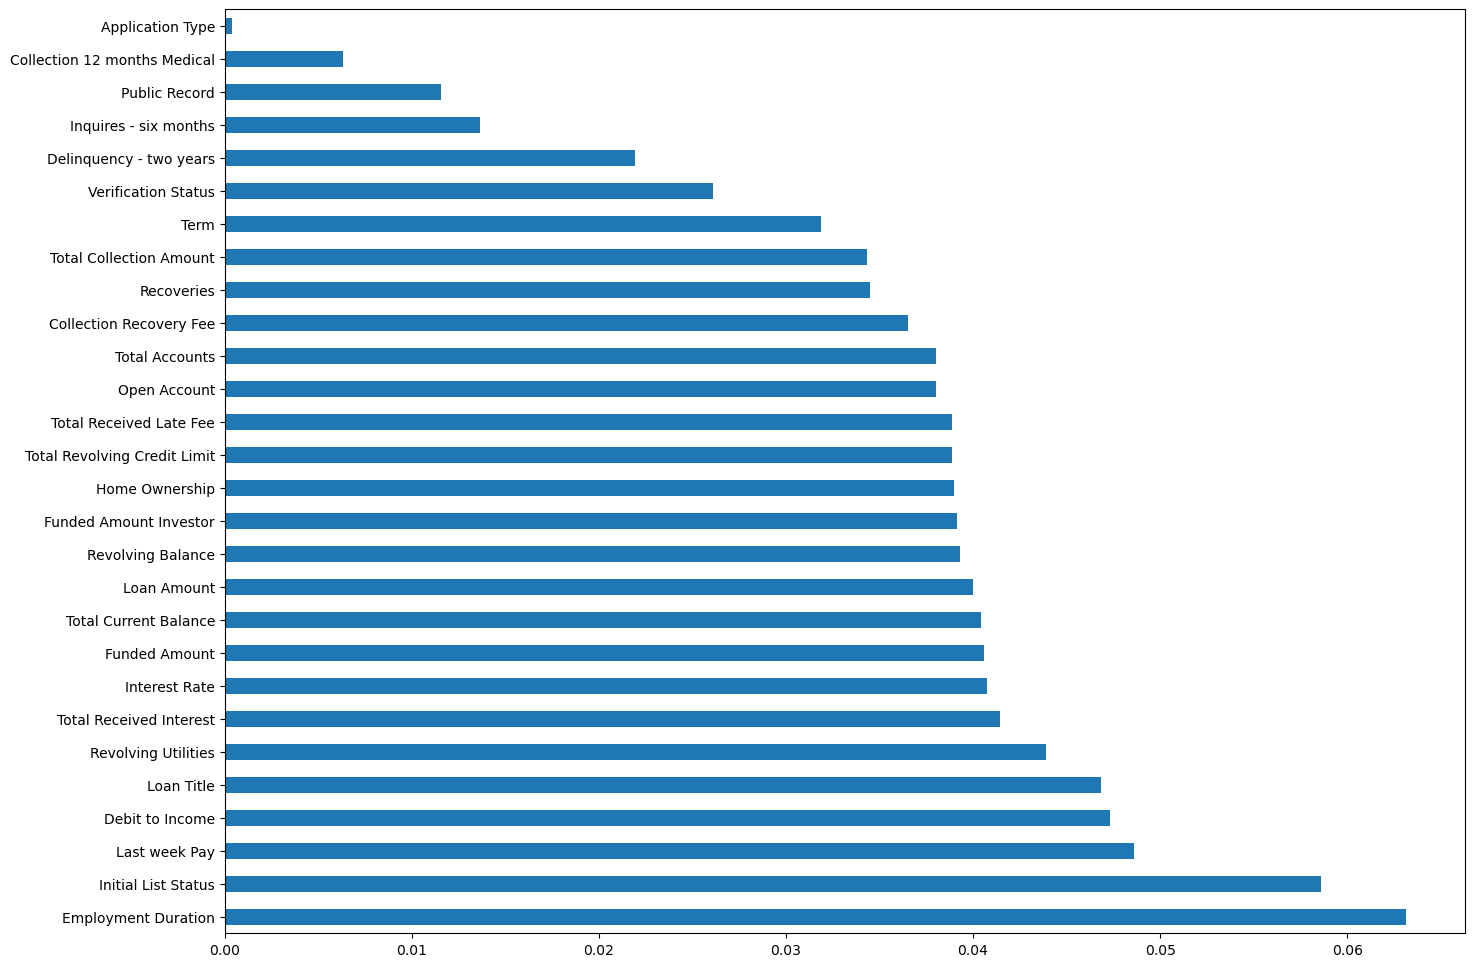

______________________________________________________________________
Getting importance of all features in descending order as a dataframe
______________________________________________________________________


,Features,Importance
5,Employment Duration,0.063130
17,Initial List Status,0.058618
24,Last week Pay,0.048623
9,Debit to Income,0.047295
8,Loan Title,0.046857
15,Revolving Utilities,0.043871
18,Total Received Interest,0.041442
4,Interest Rate,0.040746
1,Funded Amount,0.040589
26,Total Current Balance,0.040435


In [49]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x, y)


print(model.feature_importances_)



#plot graph of feature importances for better visualization
plt.figure(figsize = (16, 12))

print("Plotting graph of feature importances for better visualization")
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(x.shape[1]).plot(kind='barh')
plt.show()

print("_"*70)
#Getting importance of all features in descending order as a dataframe
print("Getting importance of all features in descending order as a dataframe")
print("_"*70)
feat_importances.sort_values(ascending=False)
feature_df=feat_importances.to_frame()
DF=feat_importances.reset_index().rename(columns={"index":"Features", 0:"Importance"})
DF=DF.sort_values(by=['Importance'], ascending=False)
display(DF)

#### Data scaling

In [50]:
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()

df=scale.fit(x)
pickle.dump(scale, open('scaler.pkl', 'wb'))
Scaler = pickle.load(open('scaler.pkl', 'rb'))
x_scaled=Scaler.transform(x)

In [51]:
x=scale_data(x)

press train for TRAIN data. Press test for TEST datatrain


In [52]:
x.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Employment Duration,Home Ownership,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,-0.515278,1.601171,-0.053928,0.0,-0.068497,0.0,2.475069,-1.0,0.000000,-0.556587,1.0,0.0,0.166667,0.0,2.728274,0.753522,-1.1,1.0,0.794287,1.208686,-0.277542,0.044418,0.0,0.0,-0.327869,-0.238095,1.064014,-0.418703
1,-1.064592,-0.096529,-0.072232,0.0,0.178229,1.0,-0.684673,0.0,0.636364,-0.631029,0.0,0.0,0.000000,0.0,-0.690128,0.875494,-0.5,0.0,-0.337164,-0.178902,-0.312080,0.385919,0.0,0.0,0.655738,0.809524,0.348006,0.186455
2,1.055567,-0.316437,1.181817,0.0,0.247224,0.0,0.511352,0.0,0.000000,0.454881,0.0,0.0,0.333333,0.0,-0.539732,-1.887723,0.2,1.0,-0.289661,394.617703,0.241062,0.471256,0.0,0.0,-0.049180,-0.095238,-0.168363,0.410007
3,-0.414715,-0.513593,0.685317,0.0,1.183798,0.0,0.899742,0.0,0.636364,-0.406484,1.0,0.0,-0.833333,0.0,1.207250,0.482921,-0.6,1.0,-0.591372,-0.011437,-0.959682,-0.038087,0.0,0.0,-0.491803,0.190476,-0.616870,1.854776
4,0.076926,0.011041,0.107380,0.0,0.798254,0.0,-0.582809,0.0,-0.363636,-0.477641,1.0,3.0,0.166667,1.0,-0.583349,1.127569,0.4,1.0,-0.674745,405.739349,368.373458,-0.756585,0.0,0.0,-0.836066,18.761905,0.033202,0.258314


#### Train test split

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.70)
print("Shape of X train:",x_train.shape)
print("Shape of Y train:",y_train.shape)
print("Shape of X test:",x_test.shape)
print("Shape of Y test:",y_test.shape)

Shape of X train: (85710, 28)
Shape of Y train: (85710,)
Shape of X test: (36734, 28)
Shape of Y test: (36734,)


## Model training and evalution of model

##### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

# starting execution time
start_time=time()

parameter={"penalty":["l1","l2"],
            "solver" : ['newton-cg', 'lbfgs', 'saga'],
          "max_iter": [100, 1000, 1500],
          "multi_class": ['auto', 'multinomial']
          }
kf=KFold(n_splits=5)
grid_sv = GridSearchCV(lr, cv=kf, param_grid=parameter, scoring='accuracy', n_jobs=-1)
grid_sv.fit(x_train, y_train)
param_dict_lr=dict(grid_sv.best_params_)

LR=LogisticRegression(penalty=param_dict_lr["penalty"], 
                         solver=param_dict_lr["solver"], 
                         max_iter= param_dict_lr["max_iter"],
                     multi_class= param_dict_lr["multi_class"])
LR.fit(x_train, y_train)
y_pred_LR=LR.predict(x_test)
print("Scores of Logistic Regression:")
model_evaluate(y_test,y_pred_LR)
print("Train Accuracy:",LR.score(x_train, y_train))
print("Test Accuracy:",LR.score(x_test, y_test))
pickle.dump(LR, open('logistic_regressor.pkl', 'wb'))

# ending time of execution
end_time=time()

final_time = (end_time-start_time)/60
# display execution time
print('final execution time is : {} minutes'.format(final_time))

Scores of Logistic Regression:
Accuracy is 0.668
F1 score is: 0.668
Train Accuracy: 0.6704235211760589
Test Accuracy: 0.6679098382969456
final execution time is : 10.48451631863912 minutes


##### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
start_time=time()
    
parameter={
    "criterion" : ["gini", "entropy"],
    "splitter" : ["best", "random"],
    "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
kf=KFold(n_splits=5)
grid_sv = GridSearchCV(DT, cv=kf, param_grid=parameter, scoring='accuracy', n_jobs=-1)
grid_sv.fit(x_train, y_train)

parameters=dict(grid_sv.best_params_)





DT=DecisionTreeClassifier(criterion=parameters["criterion"],
                          max_depth=parameters["max_depth"], 
                          splitter=parameters["splitter"])
DT.fit(x_train, y_train)
y_pred_DT=DT.predict(x_test)
model_evaluate(y_test,y_pred_DT)


print("Train Accuracy:",np.round(DT.score(x_train, y_train)*100,3),"%")
print("Test Accuracy:",np.round(DT.score(x_test, y_test)*100,3),"%")
pickle.dump(DT, open('Decision_tree.pkl', 'wb'))
# ending time of execution
end_time=time()

final_time = (end_time-start_time)/60
# display execution time
print('final execution time is : {} minutes'.format(final_time))

Accuracy is 0.776
F1 score is: 0.776
Train Accuracy: 80.237 %
Test Accuracy: 77.631 %
final execution time is : 0.33451903661092125 minutes


##### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
start_time=time()

parameter={
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_features" : ["sqrt", "log2"],
    "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
kf=KFold(n_splits=5)
grid_sv = GridSearchCV(rf, cv=kf, param_grid=parameter, scoring='accuracy', n_jobs=-1)
grid_sv.fit(x_train, y_train)

parameters=dict(grid_sv.best_params_)





RF=RandomForestClassifier(criterion=parameters["criterion"],
                          max_depth=parameters["max_depth"], 
                          max_features=parameters["max_features"])
RF.fit(x_train, y_train)
y_pred_RF=RF.predict(x_test)
model_evaluate(y_test,y_pred_RF)


print("Train Accuracy:",np.round(RF.score(x_train, y_train)*100,3),"%")
print("Test Accuracy:",np.round(RF.score(x_test, y_test)*100,3),"%")
pickle.dump(RF, open('random_forest.pkl', 'wb'))
# ending time of execution
end_time=time()

final_time = (end_time-start_time)/60
# display execution time
print('final execution time is : {} minutes'.format(final_time))

Accuracy is 0.784
F1 score is: 0.784
Train Accuracy: 80.739 %
Test Accuracy: 78.44 %
final execution time is : 8.557412127653757 minutes


##### Gradient Boost Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

start_time=time()

parameter={
    "loss" : ['log_loss', 'exponential'],
    "criterion" : ['friedman_mse', 'squared_error'],
    "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_features":['auto', 'sqrt', 'log2']
}
kf=KFold(n_splits=5)
grid_sv = GridSearchCV(gbc, cv=kf, param_grid=parameter, scoring='accuracy', verbose=3, n_jobs=-1)
grid_sv.fit(x_train, y_train)

parameters=dict(grid_sv.best_params_)





GBC=GradientBoostingClassifier(loss=parameters["loss"], 
                               criterion=parameters["criterion"],
                               max_depth=parameters["max_depth"], 
                               max_features=parameters["max_features"])
GBC.fit(x_train, y_train)
y_pred_GBC=GBC.predict(x_test)
display("-"*80)
model_evaluate(y_test,y_pred_GBC)


print("Train Accuracy:",np.round(GBC.score(x_train, y_train)*100,3),"%")
print("Test Accuracy:",np.round(GBC.score(x_test, y_test)*100,3),"%")
pickle.dump(GBC, open('gradient_boost.pkl', 'wb'))
# ending time of execution
end_time=time()

final_time = (end_time-start_time)/60
# display execution time
print('final execution time is : {} minutes'.format(final_time))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


'--------------------------------------------------------------------------------'

Accuracy is 0.877
F1 score is: 0.877
Train Accuracy: 96.43 %
Test Accuracy: 87.72 %
final execution time is : 46.74413454135259 minutes


##### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

start_time=time()

parameter={"n_neighbors" : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
          "weights":['uniform', 'distance'],
          "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
          "n_jobs":[10]}
kf=KFold(n_splits=10)
grid_knn = GridSearchCV(knn, cv=kf, param_grid=parameter, scoring='accuracy', n_jobs=-1)
grid_knn.fit(x_train, y_train)
param_dict_knn=dict(grid_knn.best_params_)

KNN=KNeighborsClassifier(n_neighbors=param_dict_knn["n_neighbors"], 
                        weights=param_dict_knn["weights"], 
                        algorithm= param_dict_knn["algorithm"])
KNN.fit(x_train, y_train)
y_pred_KNN=KNN.predict(x_test)
print("Scores of KNN Regression:")
model_evaluate(y_test,y_pred_KNN)

print("Train Accuracy:",np.round(KNN.score(x_train, y_train)*100,3),"%")
print("Test Accuracy:",np.round(KNN.score(x_test, y_test)*100,3),"%")
pickle.dump(KNN, open('knn.pkl', 'wb'))
# ending time of execution
end_time=time()

final_time = (end_time-start_time)/60
# display execution time
print('final execution time is : {} minutes'.format(final_time))

Scores of KNN Regression:
Accuracy is 0.784
F1 score is: 0.78
Train Accuracy: 88.155 %
Test Accuracy: 78.437 %
final execution time is : 103.35391173760097 minutes


#### Create data frame with all scores of each models

In [59]:
regressors = {
    'Logistic Regression' : LR,
    'Decision Tree' : DT,
    'K-nearest Neighbors' : KNN,
    'Gradient Boost' : GBC,
    'Random Forest Classifier': RF
}
results=pd.DataFrame(columns=['Train Score', 'Test Score', 'F1', 'Accuracy'])
for method,func in regressors.items():
    pred = func.predict(x_test)
    results.loc[method]= [
                          func.score(x_train, y_train),
                          func.score(x_test, y_test),
                          np.round(f1_score(y_test, pred),3),
                          np.round(accuracy_score(y_test, pred),3)
                         ]
    
final_result=results.sort_values('Accuracy',ascending=False).style.background_gradient(cmap='Blues',subset=['Accuracy'])  
display(final_result)    

,Train Score,Test Score,F1,Accuracy
Gradient Boost,0.964298,0.877198,0.874000,0.877000
K-nearest Neighbors,0.881554,0.784369,0.812000,0.784000
Random Forest Classifier,0.807385,0.784396,0.781000,0.784000
Decision Tree,0.802368,0.776311,0.765000,0.776000
Logistic Regression,0.670424,0.667910,0.673000,0.668000


Gradient boost accuracy is the best.

#### Prediction with new data set with the pre trained model

In [60]:
X_test=test.copy()

In [61]:
X_test.drop(unnecesarry_feature, inplace=True, axis=1)
X_test=replace_word(X_test)
X_test=encode_categorical_feature(X_test, column_obj)
X_test=scale_data(X_test)

press train for TRAIN data. Press test for TEST datatest


In [62]:
Model = pickle.load(open("gradient_boost.pkl", 'rb'))
prediction = Model.predict(X_test)
prediction=pd.DataFrame(data=prediction, columns=["Predicted Values"])
prediction["Predicted Values"] = prediction["Predicted Values"].map({0:"Non Defaulters",1:"Defaulters"})
prediction.head(40)

,Predicted Values
0,Non Defaulters
1,Non Defaulters
2,Non Defaulters
3,Non Defaulters
4,Non Defaulters
5,Non Defaulters
6,Non Defaulters
7,Non Defaulters
8,Non Defaulters
9,Defaulters
